<a href="https://colab.research.google.com/github/lmendezayl/modelado-continuo/blob/main/TP2IMC2025_MENDEZ_STANGALINI_DRELEWICZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2025 - Cátedra Mindlin
# **Trabajo Práctico 2**

Este es el trabajo práctico de los ejes temáticos 2 y 3. Se trata de un conjunto de ejercicios que deben resolver numéricamente y entregar para el **domingo 16 de noviembre, inclusive**. El trabajo es en **grupos de entre 2 y 3 personas**. Deben desarrollar los ejercicios en una **notebook** de Python en Google Colab. Deben **compartir el link del archivo final** (previamente dando permisos para compartir como lector), alojado en el Google Drive de alguno de los integrantes del grupo, y mandar el link del archivo al mail *hbocaccio@gmail.com*. Deben **enviar un único mail por grupo**. El nombre del archivo debe incluir los apellidos de los integrantes del grupo separados con guión bajo, resultando el siguiente **formato “TP2IMC2025_APELLIDO1_APELLIDO2_APELLIDO3.ipynb”**.

El contenido del archivo debe incluir las celdas de código necesarias para responder las consignas, intercalando con celdas de texto en las que cuenten lo que hicieron de manera resumida. También deben incluir texto explicando los resultados obtenidos y cómo estos responden a las consignas planteadas. Se valorará cualquier tipo de discusión de los resultados en referencia a conceptos tanto de la parte numérica como de la parte teórica. No es necesario que se extiendan mucho en las explicaciones, pero sí que muestren conocimientos adquiridos a lo largo de la cursada en referencia a los contenidos fundamentales de la materia.


In [77]:
import numpy as np
import matplotlib.pyplot as plt

---
# Ejercicio 1

Sea la siguiente función definida a trozos

$$
f(x) =
\begin{cases}
1 + 2x & \text{si } -1 \leq x \leq 0 \\
1 - 2x & \text{si } 0 \leq x \leq 1 \\
\end{cases}
$$

1.1. Defina una función de Python que permita calcular los valores de la función para el dominio correspondiente, y grafiquela.


In [78]:
# Definimos la función f
def f(x):
    # np.all para manejar arrays
    if not (np.all(-1 <= x) and np.all(x <= 1)):
        return None
    return 1 - 2 * np.abs(x)

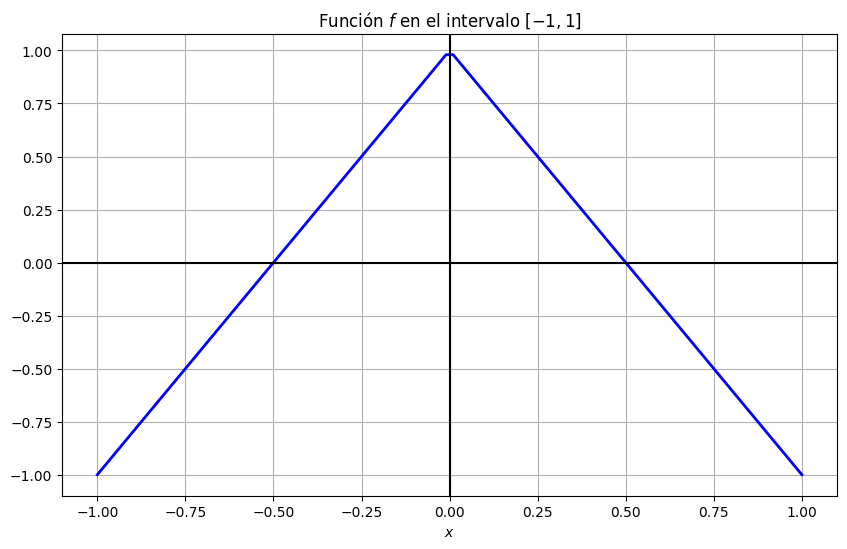

In [79]:
# Graficamos la función f en el intervalo [-1, 1]
N = 100
xs = np.linspace(-1, 1, N)

plt.figure(figsize=(10, 6))
plt.plot(xs, f(xs), color='blue', lw=2)
plt.axvline(0, color='black', lw=1.5)
plt.axhline(0, color='black', lw=1.5)
plt.title("Función $f$ en el intervalo $[-1,1]$")
plt.xlabel("$x$")
plt.grid()


1.2. La función tiene una paridad definida. Es par o impar? Mostrar con las herramientas numéricas que considere, evidencias que abonen a su especulación?


Para ver que una funcion es par, pordemos calcular la integral de la funcion $f$ en los intervalos $[-1, 0]$ y $[0, 1]$, y ver si se cumple que valen lo mismo:

In [80]:
# Verificamos que las integrales son iguales
x1 = np.linspace(0, 1, 1000)
x2 = np.linspace(-1, 0, 1000)

int1 = np.trapezoid(f(x1), x1)
int2 = np.trapezoid(f(x2), x2)

# Redondeamos a 5 decimales para mostrar que son iguales
print("La suma de las integrales es:", round(int1 + int2, 5))

La suma de las integrales es: 0.0


Ademas, la función es par ya que se cumple que $f(-x) = f(x)$. Es trivial ver que dado $x \in [0,1]$, entonces vale que $-x \in [-1,0]$. Entonces
$$f(-x) = 1+2(-x) = 1-2x = f(x)$$

Idem para $x \in [-1,0]$. Entonces $f$ es par.




Además, se puede ver graficamente que la función cumple con la simétria de una función par (función tipo coseno, simétrica respecto al eje $y$):

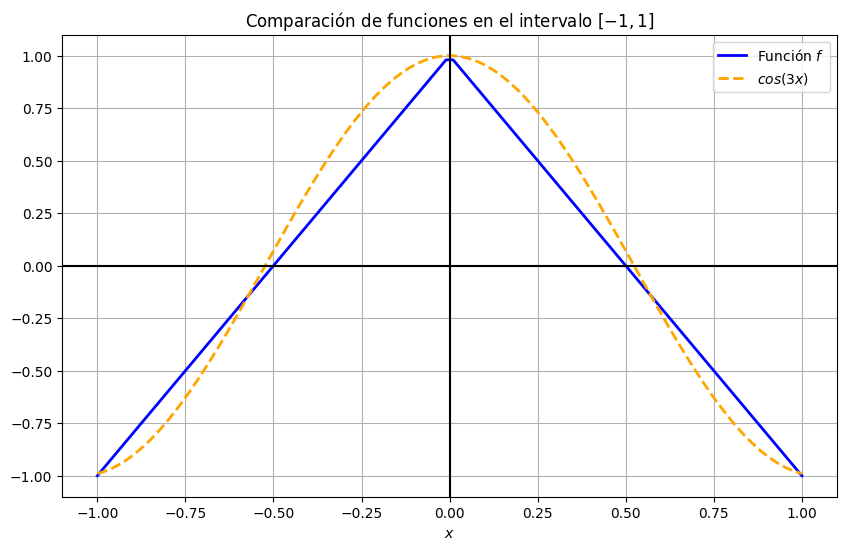

In [81]:
N = 100
xs = np.linspace(-1, 1, N)

plt.figure(figsize=(10, 6))
plt.plot(xs, f(xs), label="Función $f$", color='blue', lw=2)
plt.plot(xs, np.cos(3*xs), label='$cos(3x)$', color='orange', lw=2, linestyle='--')
plt.axvline(x=0, color='black', lw=1.5)
plt.axhline(y=0, color='black', lw=1.5)

plt.title("Comparación de funciones en el intervalo $[-1,1]$")
plt.xlabel("$x$")
plt.grid()
plt.legend()
plt.show()

1.3. Suponiendo que quiere aproximar la función definida en este dominio acotado por un desarrollo de Fourier con las consideraciones correspondientes, por ejemplo acerca del periodo. Calcule los coeficientes de Fourier hasta order N=8. Haga los gráficos en los que se vean cuánto aporta cada coeficiente a la serie.

Sabemos que como es una función par, los terminos $b_n = 0$ para todo $n \in \mathbb{N}$.

Entonces solo resta calcular los coeficientes de los $a_n$.

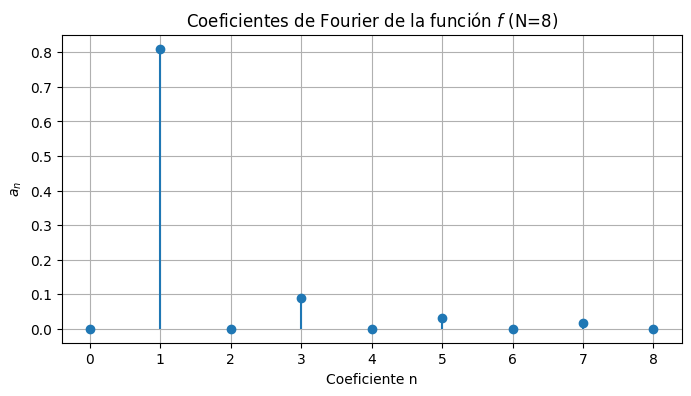

In [82]:
N = 8
L = 1
N_TRAPZS = 1000
x = np.linspace(-1, 1, N_TRAPZS+1)
dx = x[1] - x[0]

a = [0.]*(N+1) # coeficientes a_n

for n in range(N+1):
    a[n] = (1/L)*np.trapezoid(f(x) * np.cos((n*np.pi*x/L)), dx=dx)

# Con plt.stem graficamos los coeficientes como barras verticales
plt.figure(figsize=(8, 4))
plt.stem(range(0, N+1), a, basefmt=' ')
plt.title(f"Coeficientes de Fourier de la función $f$ (N={N})")
plt.xlabel("Coeficiente n")
plt.ylabel(r"$a_n$")
plt.grid()
plt.show()

Este gráfico se puede explicar por lo siguiente:
- Los modos $ \cos(n\pi x) $ en el intervalo $[-1,1]$ tienen $n$ nodos distribuidos simétricamente.  

- La función $ f(x) $ desciende linealmente desde $ f(-1) = -1 $ hasta $ f(0) = 1 $ y luego vuelve a bajar hasta $ f(1) = -1 $, formando una $\textbf{∧}$ con extremos en $-1$.  

- Para que un modo de coseno se ajuste bien a esta forma (es decir, que también valga $-1$ en los extremos) necesita presentar un número **impar de nodos**, de modo que su último tramo termine con el signo contrario al inicial.  
En los modos pares, la función coseno vuelve con signo opuesto en $ x = 1 $, lo que no coincide con el comportamiento de $ f(x) $.  
Por eso, solo los modos **impares**, con número impar de nodos, logran reproducir la estructura de $ f(x) $ que empieza y termina en $ y = -1 $.

- Por otra parte ,estos coeficientes son todos positivos debido a que en $x = 0$ la funión debe valer $1$.



1.4. Calcule y grafique la estimación de la función con una serie de Fourier truncada a N=8 términos usando los coeficientes obtenidos previamente.

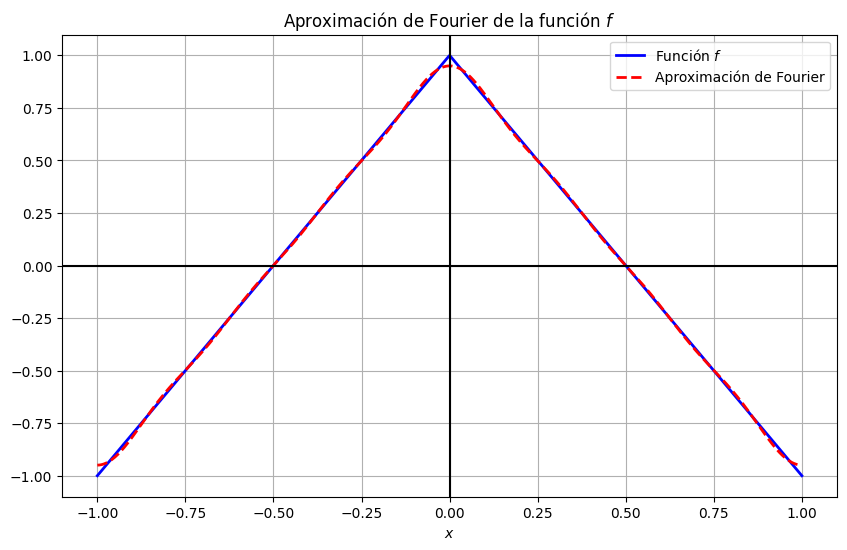

In [83]:
sf = lambda x: a[0]/2 + sum(a[n]*np.cos(n*np.pi*x/L) for n in range(1, N))

x = np.linspace(-1, 1, 1000)

plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label="Función $f$", color='blue', lw=2)
plt.plot(x, sf(x), label="Aproximación de Fourier", color='red', lw=2, linestyle='--')
plt.grid()
plt.title("Aproximación de Fourier de la función $f$")
plt.axvline(x=0, color='black', lw=1.5)
plt.axhline(y=0, color='black', lw=1.5)
plt.xlabel("$x$")
plt.legend()
plt.show()

---
# Ejercicio 2

Imagine un lanzamiento vertical de una pelota de básquet (modelo unidimensional vertical) desde el suelo en ($t=0$). La única aceleración es la gravedad ($g=9.8 m/s^{2}$) (sin rozamiento). Queremos que la pelota alcance la altura del aro ($H=3.05 m$) exactamente en $t=T=1.2 s$. El problema está descrito por la siguiente ecuación diferencial

$$
y''(t) = -g,\qquad t\in[0,T],
$$

con condiciones de contorno $y(0)=0$; $y(T)=H$.

2.1. Plantear una resolución del problema con el método de diferencias finitas usando diferencias centrales. Mostrar explícitamente cómo es la matriz de diferenciación usada y cómo queda planteado el problema de manera algebraica (hacer print() de las variables correspondientes). Resolver el problema algebraico usando `np.linalg.solve`. Graficar la solución junto con las condiciones de contorno, para visualizar su cumplimiento.

In [84]:
def tridiag(N, dinf, d, dsup):
    return np.diag(np.ones(N-1)*dinf, -1) + np.diag(np.ones(N)*d, 0) + np.diag(np.ones(N-1)*dsup, 1)

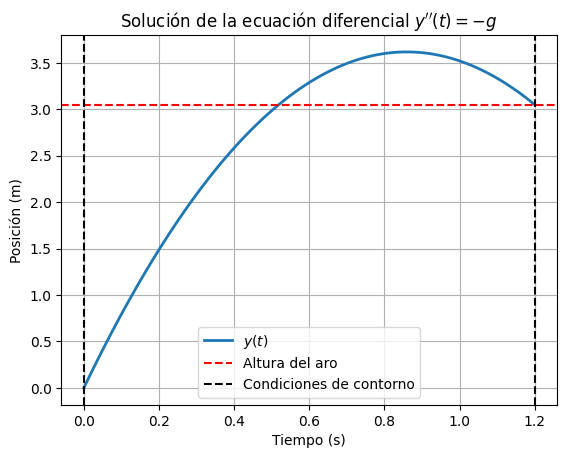

In [85]:
# Definimos constantes
g = 9.8 # m/s²
H = 3.05 # m
T = 1.2 # s

def tiro_vertical_df(N=100, dt=None, plot=False, retornar_sistema=False):
    """
    Si plot es True, grafica la solucion y(t) del problema.
    """
    # Discretizamos dominio de las variables en una grilla de valores
    if dt is not None:
        t = np.arange(0, T+dt, dt)
        N = len(t)
    else:
        t = np.linspace(0, T, N)
        dt = t[1] - t[0]

    # Aproximación de la derivada segunda con matriz de diferenciacion
    D2_central = tridiag(N, 1, -2, 1)

    # Lado derecho de la ec dif
    b = -g * np.ones(N) * dt**2

    # Condiciones de contorno en la matriz
    # Primer fila
    b[0] = 0
    D2_central[0, 0], D2_central[0][1] = 1, 0

    # Ultima fila
    b[-1] = H
    D2_central[-1, -2], D2_central[-1, -1] = 0, 1

    y = np.linalg.solve(D2_central, b)
    if plot:
        plt.plot(t, y, label='$y(t)$', lw=2)
        plt.axhline(H, color='red', linestyle='--', label='Altura del aro')
        plt.axvline(0, color='black', linestyle='--')
        plt.axvline(T, color='black', linestyle='--', label="Condiciones de contorno")

        plt.title("Solución de la ecuación diferencial $y''(t) = -g$")
        plt.xlabel("Tiempo (s)")

        plt.ylabel("Posición (m)")
        plt.legend()
        plt.grid()
        plt.show()
    if retornar_sistema:
        return D2_central, b
    return t, yel

_ = tiro_vertical_df(101, plot=True) # llamo así porque no usamos estas variables

Y acá como queda el sistema lineal planteado para $N=5$ ($N$ más chico para poder ver el sistema entero):

In [86]:
N = 5
D, b = tiro_vertical_df(N, plot=False, retornar_sistema=True)

print("D y = b\n")
for i in range(len(D)):
    fila = " ".join([f"{val:6.2f}" for val in D[i, :]])
    print(f"[ {fila} ]  [y_{i}] = [{b[i]:6.2f}]")

D y = b

[   1.00   0.00   0.00   0.00   0.00 ]  [y_0] = [  0.00]
[   1.00  -2.00   1.00   0.00   0.00 ]  [y_1] = [ -0.88]
[   0.00   1.00  -2.00   1.00   0.00 ]  [y_2] = [ -0.88]
[   0.00   0.00   1.00  -2.00   1.00 ]  [y_3] = [ -0.88]
[   0.00   0.00   0.00   0.00   1.00 ]  [y_4] = [  3.05]



2.2. Estimar el valor de la velocidad inicial necesaria para lograr el tiro usando diferencias finitas con el método forward.


In [87]:
t, y = tiro_vertical_df(100)

v_0 = (y[1] - y[0]) / (t[1] - t[0])
print(f"La velocidad inicial necesaria es aproximadamente: {v_0:.2f} m/s")

La velocidad inicial necesaria es aproximadamente: 8.36 m/s



2.3. Agregar a la ecuación un término disipativo que podría ser el rozamiento con el aire. Considere un coeficiente de rozamiento $\gamma=2$ y resuelva con diferencias centrales. Cómo debería ser la velocidad inicial para este caso?

---

Ahora la ecuación diferencial es

$$
y''(t) = -g - \gamma y'(t) ⟹ y''(t) + γy(t) = -g \qquad t\in[0,T]
$$

con condiciones de contorno $y(0)=0$; $y(T)=H$.

Para discretizar el problema tomamos un paso $Δt = T/N$ → $\left\{t_j=j \ Δt, \ y_j = y(t_j),  \ j=0,...,N-1\right\}$. De esta forma, la ecuación diferencial discretizada se puede escribir, tomando diferencias centrales tanto para $y''$ como para $y'$,

$$\frac{y_{+1} - 2y_j + y_{j-1}}{dt^2} + γ \frac{y_{+1} - y_{j-1}}{2dt} = -g$$

En particular, las condiciones de contorno quedan

$$\begin{cases}
y_0 = y(t_0)=y(0)= 0 & \\
y_{N-1}=y(t_{N-1}) = y(T)=H
\end{cases}$$

Además Podemos reescribir la ecuación de diferencias finitas, pensando que sobre el vector $\textbf{y} = (y_0, ..., y_{N-1})^T $ actuan los operadores de diferenciación centrales $D_2$ y $D_1$ que vimos en la práctica:

$$(D_2 + γ D_1) \textbf{y} = \textbf{b}$$



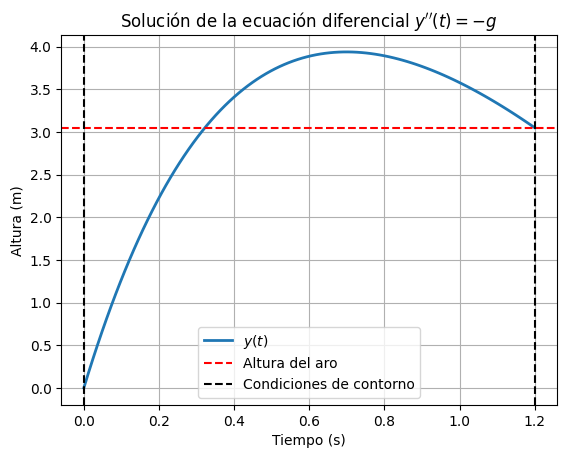

In [88]:
# Definimos constantes
g = 9.8 # m/s²
gamma = 2
H = 3.05 # m
T = 1.2 # s

N = 100 # cantidad de puntos grilla de tiempos
dt = T / N # paso de tiempo

D2_central = tridiag(N, 1, -2, 1) / (dt**2) # derivada segunda central
D1_central = tridiag(N, -1, 0, 1) / (2*dt) # derivada primera central
A = D2_central + gamma * D1_central

# Lado derecho de la ec dif
b = -g * np.ones(N)

# Condiciones de contorno
# Primer fila
b[0] = 0
A[0, :] = 0
A[0, 0] = 1
# Ultima fila
b[-1] = H
A[-1, :] = 0
A[-1, -1] = 1

y = np.linalg.solve(A, b)

plt.plot(t, y, label='$y(t)$', lw=2)
plt.axhline(H, color='red', linestyle='--', label='Altura del aro')
plt.axvline(0, color='black', linestyle='--')
plt.axvline(T, color='black', linestyle='--', label="Condiciones de contorno")

plt.title("Solución de la ecuación diferencial $y''(t) = -g$")
plt.xlabel("Tiempo (s)")

plt.ylabel("Altura (m)")
plt.legend()
plt.grid()
plt.show()

In [89]:
v_0 = (y[1] - y[0]) / (t[1] - t[0])
print(f"La velocidad inicial necesaria es aproximadamente: {v_0:.2f} m/s")

La velocidad inicial necesaria es aproximadamente: 14.28 m/s


Esta velocidad inicial resulta mayor la estimada que sin rozamiento lo cual es totalmente esperable ya que debería costar más realizar el mismo.